<a href="https://colab.research.google.com/github/VuMaiTuan/20144483-VuMaiTuan/blob/main/Mon_an_Viet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Nhan dien mon an Viet/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 419 images belonging to 5 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Nhan dien mon an Viet/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 180 images belonging to 5 classes.


In [ ]:
training_set.class_indices

{'Banh tet': 0, 'Ca kho to': 1, 'Com tam': 2, 'Nem': 3, 'Pho': 4}

In [ ]:
validation.class_indices

{'Banh tet': 0, 'Ca kho to': 1, 'Com tam': 2, 'Nem': 3, 'Pho': 4}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=500,batch_size=128,verbose=1, validation_data=validation)

Epoch 1/500
14/14 [==============================] - 284s 21s/step - loss: 4.1060 - accuracy: 0.1981 - val_loss: 1.5371 - val_accuracy: 0.3222
Epoch 2/500
14/14 [==============================] - 12s 836ms/step - loss: 1.5100 - accuracy: 0.3461 - val_loss: 1.4177 - val_accuracy: 0.3333
Epoch 3/500
14/14 [==============================] - 10s 745ms/step - loss: 1.3119 - accuracy: 0.4224 - val_loss: 1.3386 - val_accuracy: 0.4556
Epoch 4/500
14/14 [==============================] - 11s 785ms/step - loss: 1.2804 - accuracy: 0.4200 - val_loss: 1.3212 - val_accuracy: 0.4389
Epoch 5/500
14/14 [==============================] - 11s 753ms/step - loss: 1.2256 - accuracy: 0.4654 - val_loss: 1.2806 - val_accuracy: 0.4500
Epoch 6/500
14/14 [==============================] - 10s 753ms/step - loss: 1.3551 - accuracy: 0.4558 - val_loss: 1.3255 - val_accuracy: 0.4556
Epoch 7/500
14/14 [==============================] - 11s 833ms/step - loss: 1.3075 - accuracy: 0.4463 - val_loss: 1.3799 - val_accuracy: 

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.00011051625187974423
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

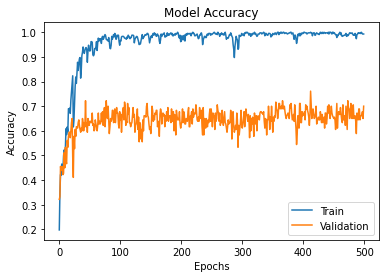

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("MonAn.h5")

In [ ]:
model_CNN=load_model("MonAn.h5")

1/1 [==============================] - 0s 16ms/step
Nem


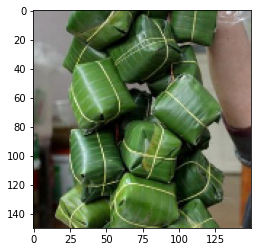

1/1 [==============================] - 0s 17ms/step
Nem


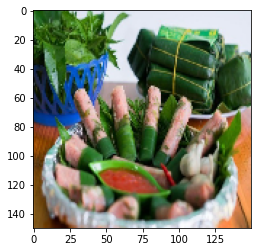

1/1 [==============================] - 0s 17ms/step
Ca kho to


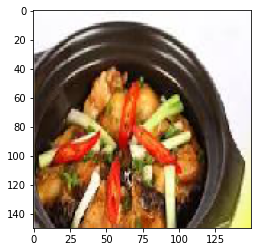

1/1 [==============================] - 0s 17ms/step
Ca kho to


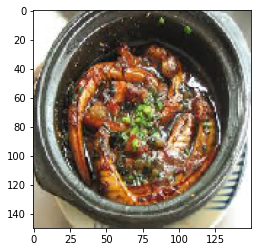

1/1 [==============================] - 0s 18ms/step
Ca kho to


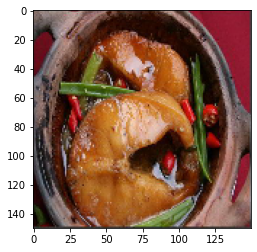

1/1 [==============================] - 0s 18ms/step
Pho


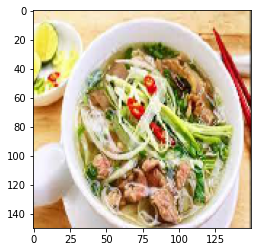

1/1 [==============================] - 0s 15ms/step
Com tam


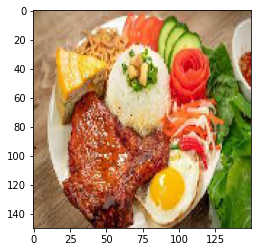

1/1 [==============================] - 0s 15ms/step
Com tam


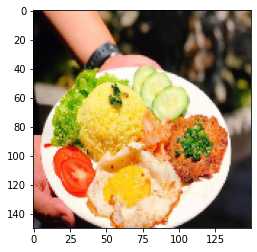

1/1 [==============================] - 0s 15ms/step
Banh tet


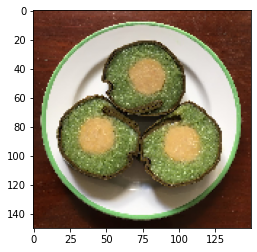

In [ ]:
test="/content/gdrive/MyDrive/Colab Notebooks/Nhan dien mon an Viet/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Banh tet'
  if round(result[0][1])==1:
    prediction='Ca kho to'
  if round(result[0][2])==1:
    prediction='Com tam'
  if round(result[0][3])==1:
    prediction='Nem'
  if round(result[0][4])==1:
    prediction='Pho'
  print(prediction)
  plt.show()